## Hypothesis Function  (sigmoid)

$$
\large h \; = \; h(\theta^T X)\; = \;\frac{1}{1 + \exp^{-\theta^T X}}\;\quad; \; \theta\;=\;(a, b) \; for \; linear\; model
$$

## Loss Function

$$
\large Loss \;(Cross Entropy) \; = \; -\frac{1}{n}\sum_{i=1}^n t_i \log (h) + (1-t_i) \log (1-h)
$$

## Gradient Descent

$$
\large \theta_i \;=\; \theta_i - \frac{\alpha}{n} \sum_{i=1}^{n}\frac{\partial Loss}{\partial \theta} \quad ; \; \alpha=Learning\; Rate
$$

## Loss Function Partial Derivative

$$
\large \frac{\partial Loss}{\partial \theta} \;=\; -\Big\{t_i\frac{1}{h} + (1-t_i)\frac{1}{1-h}(-1) \Big\}\frac{\partial h}{\partial \theta}
$$

$$
\large \frac{ \partial h}{\partial \theta} \;=\; h(1-h)X
$$

$$
\large=\; -\Big\{t_i\frac{1}{h} + (1-t_i)\frac{1}{1-h}(-1) \Big\} h(1-h)X
$$

$$
\large \;=\; -\Big\{t_i(1-h) - (1-t_i)h \Big\} X\;=\; \Bigl(h - t_i \Bigr) X
$$

In [96]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
pos_x = np.linspace(0, 15, 5)
neg_x = np.linspace(10, 30, 5)

pos_t = np.ones(len(pos_x))
neg_t = np.zeros(len(neg_x))

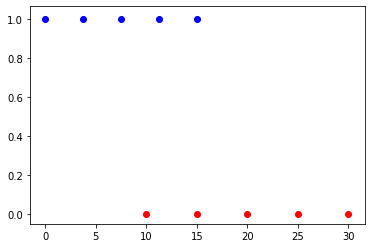

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax = plt.scatter(pos_x, pos_t, c='blue')
ax = plt.scatter(neg_x, neg_t, c='red')
fig.show()

In [99]:
learning_rate = 0.001
num_steps = 50000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.append(pos_x, neg_x)
t = np.append(pos_t, neg_t)

W = np.array([np.random.rand(), 0])
X = np.array([x, np.ones(len(x))])
print(W)

[0.97244684 0.        ]


In [100]:
for _ in range(num_steps):
    y = sigmoid(np.dot(W.transpose(), X))
    W += learning_rate * np.dot((t - y), X.transpose()) / len(x)
W

array([-0.23742148,  2.98445144])

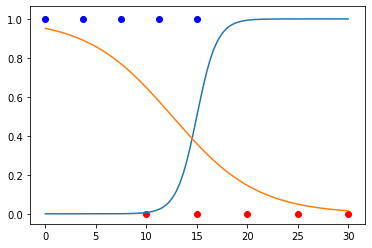

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sample_x = np.linspace(0, 30, 2000)
sample_X = np.array([sample_x, np.ones(2000)])

ax = plt.scatter(pos_x, pos_t, c='blue')
ax = plt.scatter(neg_x, neg_t, c='red')
ax = plt.plot(sample_x, sigmoid(sample_x - 15))
ax = plt.plot(sample_x, sigmoid(np.dot(W.transpose(), sample_X)))
fig.show()